In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import transforms, datasets
import torch.optim as optim
from torch.autograd import Variable
import torchvision

import matplotlib.pyplot as plt
import time

In [2]:
apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
BatchSize = 256
BatchSize2 = 1024

trainset = datasets.MNIST(root='./MNIST'
                           ,train = True
                          , download = True
                         , transform = apply_transform)
trainLoader = torch.utils.data.DataLoader(
    trainset,
    batch_size = BatchSize,
    shuffle=True,
    num_workers=4
)

testset = datasets.MNIST(root='./MNIST'
                           ,train = False
                          , download = True
                         , transform = apply_transform)
testLoader = torch.utils.data.DataLoader(
    testset,
    batch_size = BatchSize,
    shuffle=True,
    num_workers=4
)

trainset2 = datasets.MNIST(root='./MNIST'
                           ,train = True
                          , download = True
                         , transform = apply_transform)
trainLoader2 = torch.utils.data.DataLoader(
    trainset2,
    batch_size = BatchSize2,
    shuffle=True,
    num_workers=4
)

testset2 = datasets.MNIST(root='./MNIST'
                           ,train = False
                          , download = True
                         , transform = apply_transform)
testLoader2 = torch.utils.data.DataLoader(
    testset2,
    batch_size = BatchSize2,
    shuffle=True,
    num_workers=4
)

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
# Size of train and test datasets
print('No. of samples in train set:' + str(len(trainLoader.dataset)))
print('No. of samples in test set:' + str(len(testLoader.dataset)))

# Size of train and test datasets
print('No. of samples in train set:' + str(len(trainLoader2.dataset)))
print('No. of samples in test set:' + str(len(testLoader2.dataset)))

No. of samples in train set:60000
No. of samples in test set:10000
No. of samples in train set:60000
No. of samples in test set:10000


In [4]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.conv1 = nn.Conv2d(1,6, kernel_size=5)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(6,16, kernel_size=5)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(400, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool1(x)
    x = F.relu(self.conv2(x))
    x = self.pool2(x)
    x = x.view(-1, 400)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x, dim=1)

In [5]:
use_gpu = torch.cuda.is_available()
net1 = LeNet()
net2 = LeNet()
net3 = LeNet()
net4 = LeNet()

if use_gpu:
  print('GPU is available!')
  net1 = net1.cuda()
  net2 = net2.cuda()
  net3 = net3.cuda()
  net4 = net4.cuda()

GPU is available!


##Q1
Using batchsize 256 and 1024

In [6]:
criterion = nn.CrossEntropyLoss()
learning_rate1 = 0.1
optimizer1 = optim.SGD(net1.parameters(), lr = learning_rate1, momentum=0.9)
num_epochs = 25

train_loss = []
train_acc = []
for epoch in range(num_epochs):
  running_loss = 0.0
  running_corr = 0
  for i, data in enumerate(trainLoader):
    inputs, labels = data
    if use_gpu:
      inputs, labels = inputs.cuda(), labels.cuda()
      # Initializing model gradients to zero
      optimizer1.zero_grad()
      # Data feed-forward through the network
      outputs1 = net1(inputs)
      preds1 = torch.argmax(outputs1, dim=1)
      # Finding the loss
      loss = criterion(outputs1, labels)
      # Accumulating the loss for each batch
      running_loss+=loss
      # Accumulating the number of correct predictions
      running_corr += torch.sum(preds1 == labels)

  totalLoss1 = running_loss/(i+1)
  # Calculating gradients
  totalLoss1.backward()
  #Updating model parameters
  optimizer1.step()

  epoch_loss = running_loss.item()/(i+1) # Total loss for one epoch
  epoch_acc = running_corr.item()/60000

  train_loss.append(epoch_loss) # Saving the loss over epochs for plotting the graph
  train_acc.append(epoch_acc)

  print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training accuracy: {:.4f}'.format(epoch+1, 50, epoch_loss, epoch_acc))

Epoch 1/50 : Training loss: 2.3040 | Training accuracy: 0.1019
Epoch 2/50 : Training loss: 2.3033 | Training accuracy: 0.1019
Epoch 3/50 : Training loss: 2.3022 | Training accuracy: 0.1019
Epoch 4/50 : Training loss: 2.3006 | Training accuracy: 0.1018
Epoch 5/50 : Training loss: 2.2985 | Training accuracy: 0.1014
Epoch 6/50 : Training loss: 2.2962 | Training accuracy: 0.1025
Epoch 7/50 : Training loss: 2.2938 | Training accuracy: 0.1245
Epoch 8/50 : Training loss: 2.2910 | Training accuracy: 0.1910
Epoch 9/50 : Training loss: 2.2880 | Training accuracy: 0.2285
Epoch 10/50 : Training loss: 2.2842 | Training accuracy: 0.2575
Epoch 11/50 : Training loss: 2.2795 | Training accuracy: 0.3010
Epoch 12/50 : Training loss: 2.2736 | Training accuracy: 0.3609
Epoch 13/50 : Training loss: 2.2658 | Training accuracy: 0.4158
Epoch 14/50 : Training loss: 2.2552 | Training accuracy: 0.4627
Epoch 15/50 : Training loss: 2.2410 | Training accuracy: 0.4678
Epoch 16/50 : Training loss: 2.2210 | Training ac

In [7]:
correct_pred1 = 0
loss_pred1 = 0
for data in testLoader:
  inputs, labels = data
  if use_gpu:
    inputs, labels = inputs.cuda(), labels.cuda()
  output1 = net1(inputs)
  preds1 = torch.argmax(output1, dim=1)
  correct_pred1 += torch.sum(preds1 == labels)
  loss_pred1 = criterion(output1, labels)

test_accuracy = correct_pred1.item()/10000.0

print('Testing accuracy (Batch size=256, lr=0.1) = ', test_accuracy* 100)
print('Loss ' + str(loss_pred1))

Testing accuracy (Batch size=256, lr=0.1) =  23.44
Loss tensor(2.3214, device='cuda:0', grad_fn=<NllLossBackward>)


In [8]:
criterion = nn.CrossEntropyLoss()
learning_rate2 = 0.1
optimizer2 = optim.SGD(net2.parameters(), lr = learning_rate2, momentum=0.9)
num_epoch2 = 25

train_loss2 = []
train_acc2 = []
for epoch in range(num_epoch2):
  running_loss = 0.0
  running_corr = 0

  for i, data in enumerate(trainLoader2):
    inputs, labels = data
    if use_gpu:
      inputs, labels = inputs.cuda(), labels.cuda()
      # Initializing model gradients to zero
      optimizer2.zero_grad()
      # Data feed-forward through the network
      outputs2 = net2(inputs) 
      preds2 = torch.argmax(outputs2, dim=1)
      # Finding the loss
      loss = criterion(outputs2, labels)
      # Accumulating the loss for each batch
      running_loss+=loss
      # Accumulating the number of correct predictions
      running_corr += torch.sum(preds2 == labels)
  
  
  totalLoss2 = running_loss/(i+1)
  # Calculating gradients
  totalLoss2.backward()
  #Updating model parameters
  optimizer2.step()

  epoch_loss = running_loss.item()/(i+1) # Total loss for one epoch
  epoch_acc = running_corr.item()/60000

  train_loss2.append(epoch_loss) # Saving the loss over epochs for plotting the graph
  train_acc2.append(epoch_acc)

  print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training accuracy: {:.4f}'.format(epoch+1, 50, epoch_loss, epoch_acc))

Epoch 1/50 : Training loss: 2.3046 | Training accuracy: 0.1085
Epoch 2/50 : Training loss: 2.3044 | Training accuracy: 0.1122
Epoch 3/50 : Training loss: 2.3041 | Training accuracy: 0.1107
Epoch 4/50 : Training loss: 2.3036 | Training accuracy: 0.0982
Epoch 5/50 : Training loss: 2.3031 | Training accuracy: 0.0957
Epoch 6/50 : Training loss: 2.3025 | Training accuracy: 0.0987
Epoch 7/50 : Training loss: 2.3019 | Training accuracy: 0.1013
Epoch 8/50 : Training loss: 2.3012 | Training accuracy: 0.1316
Epoch 9/50 : Training loss: 2.3006 | Training accuracy: 0.1124
Epoch 10/50 : Training loss: 2.3000 | Training accuracy: 0.1124
Epoch 11/50 : Training loss: 2.2993 | Training accuracy: 0.1124
Epoch 12/50 : Training loss: 2.2986 | Training accuracy: 0.1124
Epoch 13/50 : Training loss: 2.2980 | Training accuracy: 0.1124
Epoch 14/50 : Training loss: 2.2974 | Training accuracy: 0.1124
Epoch 15/50 : Training loss: 2.2967 | Training accuracy: 0.1124
Epoch 16/50 : Training loss: 2.2961 | Training ac

In [10]:
correct_pred2 = 0
loss_pred2 = 0
for data in testLoader2:
  input, labels = data
  if use_gpu:
    inputs, labels = input.cuda(), labels.cuda()
  output = net2(inputs)
  preds2 = torch.argmax(output, dim=1)
  correct_pred2 += torch.sum(preds2 == labels)
  loss_pred2 += criterion(output, labels)

test_accuracy2 = correct_pred2.item()/10000.0
print('Testing accuracy (Batch size=1024, lr=0.1) = ', test_accuracy2* 100)
print('Loss ' + str(loss_pred2))

Testing accuracy (Batch size=1024, lr=0.1) =  21.91
Loss tensor(22.7955, device='cuda:0', grad_fn=<AddBackward0>)


Text(0, 0.5, 'Training Accuracy')

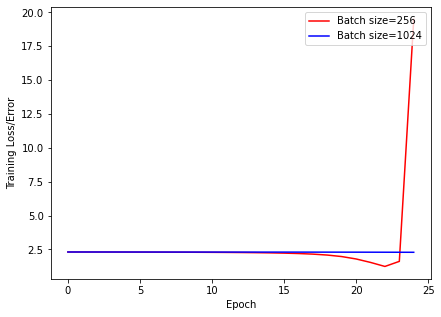

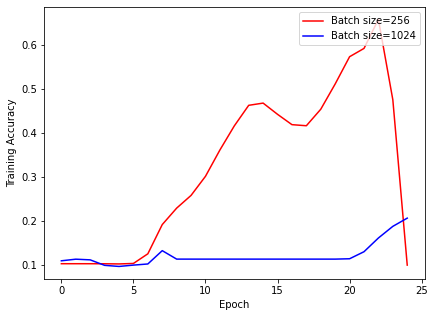

In [11]:
fig = plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(range(num_epochs), train_loss, 'r-', label='Batch size=256')
plt.plot(range(num_epoch2), train_loss2, 'r-', color='blue', label='Batch size=1024')

plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Training Loss/Error')

fig = plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(range(num_epochs), train_acc, 'r-', label='Batch size=256')
plt.plot(range(num_epoch2), train_acc2, 'r-', color='blue', label='Batch size=1024')

plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')

##Q2
lr -> 0.025, 0.05, 0.1, 0.2, 0.5

In [12]:
lr_arr = [0.025, 0.05, 0.1, 0.2, 0.5]

In [14]:
use_gpu = torch.cuda.is_available()
net3 = LeNet()
testacc = []
for learning_rate1 in lr_arr:
  print("Doing for learning_rate " + str(learning_rate1) )
  if use_gpu:
    net3 = net3.cuda()
  criterion = nn.CrossEntropyLoss()
  # learning_rate1 = 0.1
  optimizer3 = optim.SGD(net3.parameters(), lr = learning_rate1, momentum=0.9)
  num_epochs = 10

  train_loss = []
  train_acc = []
  for epoch in range(num_epochs):
    running_loss = 0.0
    running_corr = 0
    for i, data in enumerate(trainLoader):
      inputs, labels = data
      if use_gpu:
        inputs, labels = inputs.cuda(), labels.cuda()
        # Initializing model gradients to zero
        optimizer3.zero_grad()
        # Data feed-forward through the network
        outputs3 = net3(inputs)
        preds3 = torch.argmax(outputs3, dim=1)
        # Finding the loss
        loss = criterion(outputs3, labels)
        # Accumulating the loss for each batch
        running_loss+=loss
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds3 == labels)

    totalLoss3 = running_loss/(i+1)
    # Calculating gradients
    totalLoss3.backward()
    #Updating model parameters
    optimizer3.step()

    epoch_loss = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc = running_corr.item()/60000

    train_loss.append(epoch_loss) # Saving the loss over epochs for plotting the graph
    train_acc.append(epoch_acc)

    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training accuracy: {:.4f}'.format(epoch+1, 50, epoch_loss, epoch_acc))


  correct_pred2 = 0
  loss_pred2 = 0
  for data in testLoader:
    input, labels = data
    if use_gpu:
      inputs, labels = input.cuda(), labels.cuda()
    output = net3(inputs)
    preds2 = torch.argmax(output, dim=1)
    loss = criterion(output, labels)
    loss_pred2 += loss
    correct_pred2 += torch.sum(preds2 == labels)

  test_accuracy2 = correct_pred2.item()/10000.0
  testacc.append(test_accuracy2)
  print('Testing accuracy (Batch size=256, lr=' + str(learning_rate1) + ') = ', test_accuracy2* 100)
  print('Loss ' + str(loss_pred2))

Doing for learning_rate 0.025
Epoch 1/50 : Training loss: 2.3060 | Training accuracy: 0.0903
Epoch 2/50 : Training loss: 2.3059 | Training accuracy: 0.0903
Epoch 3/50 : Training loss: 2.3058 | Training accuracy: 0.0903
Epoch 4/50 : Training loss: 2.3056 | Training accuracy: 0.0903
Epoch 5/50 : Training loss: 2.3054 | Training accuracy: 0.0903
Epoch 6/50 : Training loss: 2.3051 | Training accuracy: 0.0903
Epoch 7/50 : Training loss: 2.3048 | Training accuracy: 0.0903
Epoch 8/50 : Training loss: 2.3045 | Training accuracy: 0.0904
Epoch 9/50 : Training loss: 2.3041 | Training accuracy: 0.0903
Epoch 10/50 : Training loss: 2.3038 | Training accuracy: 0.0898
Testing accuracy (Batch size=256, lr=0.025) =  8.780000000000001
Loss tensor(92.1379, device='cuda:0', grad_fn=<AddBackward0>)
Doing for learning_rate 0.05
Epoch 1/50 : Training loss: 2.3034 | Training accuracy: 0.0884
Epoch 2/50 : Training loss: 2.3033 | Training accuracy: 0.0876
Epoch 3/50 : Training loss: 2.3031 | Training accuracy: 0

Text(0, 0.5, 'Test Accuracy')

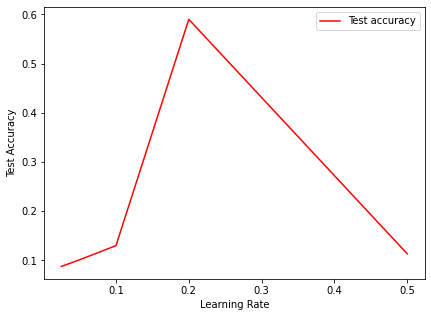

In [15]:
fig = plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(lr_arr, testacc, 'r-', label='Test accuracy')

plt.legend(loc='upper right')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')

#6.b) I would choose learning rate as 0.2 since it has most test accuracy

##Q3

In [16]:
criterion = nn.CrossEntropyLoss()
learning_rate1 = 0.3
optimizer1 = optim.SGD(net4.parameters(), lr = learning_rate1, momentum=0.9)
num_epochs = 50

train_loss = []
train_acc = []
for epoch in range(num_epochs):
  running_loss = 0.0
  running_corr = 0
  if  (epoch%5==0):
    learning_rate1 -= 0.005*(epoch/4)
    optimizer1 = optim.SGD(net4.parameters(), lr = learning_rate1, momentum=0.9)
    print("LEARNING RATE: " + str(learning_rate1))
  for i, data in enumerate(trainLoader):
    inputs, labels = data
    if use_gpu:
      inputs, labels = inputs.cuda(), labels.cuda()
      # Initializing model gradients to zero
      optimizer1.zero_grad()
      # Data feed-forward through the network
      outputs1 = net4(inputs)
      preds1 = torch.argmax(outputs1, dim=1)
      # Finding the loss
      loss = criterion(outputs1, labels)
      # Accumulating the loss for each batch
      running_loss+=loss
      # Accumulating the number of correct predictions
      running_corr += torch.sum(preds1 == labels)

  totalLoss1 = running_loss/(i+1)
  # Calculating gradients
  totalLoss1.backward()
  #Updating model parameters
  optimizer1.step()

  epoch_loss = running_loss.item()/(i+1) # Total loss for one epoch
  epoch_acc = running_corr.item()/60000

  train_loss.append(epoch_loss) # Saving the loss over epochs for plotting the graph
  train_acc.append(epoch_acc)

  print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training accuracy: {:.4f}'.format(epoch+1, 50, epoch_loss, epoch_acc))

LEARNING RATE: 0.3
Epoch 1/50 : Training loss: 2.3048 | Training accuracy: 0.0972
Epoch 2/50 : Training loss: 2.3033 | Training accuracy: 0.0953
Epoch 3/50 : Training loss: 2.3008 | Training accuracy: 0.0807
Epoch 4/50 : Training loss: 2.2980 | Training accuracy: 0.1003
Epoch 5/50 : Training loss: 2.2948 | Training accuracy: 0.0993
LEARNING RATE: 0.29375
Epoch 6/50 : Training loss: 2.2907 | Training accuracy: 0.1153
Epoch 7/50 : Training loss: 2.2888 | Training accuracy: 0.1306
Epoch 8/50 : Training loss: 2.2851 | Training accuracy: 0.1741
Epoch 9/50 : Training loss: 2.2788 | Training accuracy: 0.2196
Epoch 10/50 : Training loss: 2.2683 | Training accuracy: 0.2487
LEARNING RATE: 0.28125
Epoch 11/50 : Training loss: 2.2490 | Training accuracy: 0.2990
Epoch 12/50 : Training loss: 2.2365 | Training accuracy: 0.3443
Epoch 13/50 : Training loss: 2.2078 | Training accuracy: 0.3357
Epoch 14/50 : Training loss: 2.1451 | Training accuracy: 0.3415
Epoch 15/50 : Training loss: 2.0005 | Training a

Text(0, 0.5, 'Training Accuracy')

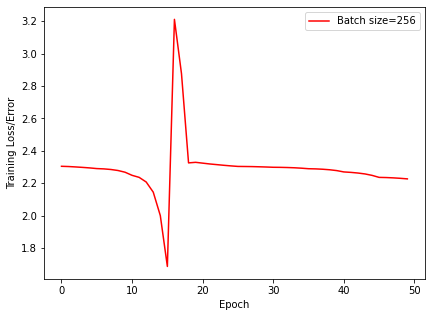

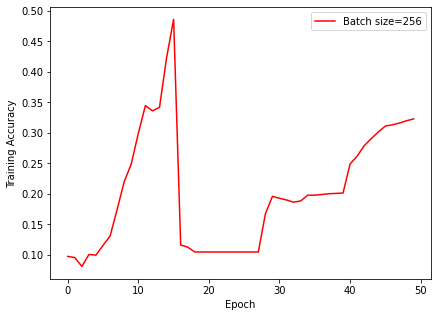

In [17]:
fig = plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(range(num_epochs), train_loss, 'r-', label='Batch size=256')

plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Training Loss/Error')

fig = plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(range(num_epochs), train_acc, 'r-', label='Batch size=256')

plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')criterion = nn.CrossEntropyLoss()
learning_rate1 = 0.1
optimizer1 = optim.SGD(net1.parameters(), lr = learning_rate1, momentum=0.9)
num_epochs = 25

train_loss = []
train_acc = []
for epoch in range(num_epochs):
  running_loss = 0.0
  running_corr = 0
  for i, data in enumerate(trainLoader):
    inputs, labels = data
    if use_gpu:
      inputs, labels = inputs.cuda(), labels.cuda()
      # Initializing model gradients to zero
      optimizer1.zero_grad()
      # Data feed-forward through the network
      outputs1 = net1(inputs)
      preds1 = torch.argmax(outputs1, dim=1)
      # Finding the loss
      loss = criterion(outputs1, labels)
      # Accumulating the loss for each batch
      running_loss+=loss
      # Accumulating the number of correct predictions
      running_corr += torch.sum(preds1 == labels)

  totalLoss1 = running_loss/(i+1)
  # Calculating gradients
  totalLoss1.backward()
  #Updating model parameters
  optimizer1.step()

  epoch_loss = running_loss.item()/(i+1) # Total loss for one epoch
  epoch_acc = running_corr.item()/60000

  train_loss.append(epoch_loss) # Saving the loss over epochs for plotting the graph
  train_acc.append(epoch_acc)

  print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training accuracy: {:.4f}'.format(epoch+1, 50, epoch_loss, epoch_acc))

#6 .c)The accuracy first increases then at a particular value 0.28 it becomes maximum then decreases suddenly. Hence this is the point of convergence and this value should be chosen for the model.